<a href="https://colab.research.google.com/github/geffenmoser/tta-exercises-post-week-7--6-24/blob/main/Week8day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Titanic_Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [3]:
df.info()
df.isnull().sum()
duplicated = df.duplicated(keep='first')
print(duplicated[duplicated == True])
df.drop_duplicates(inplace=True)
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
Series([], dtype: bool)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [4]:
drop_columns = ['Cabin']
df.drop(drop_columns, axis=1, inplace=True)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df[['Fare']] = imputer.fit_transform(df[['Fare']])

In [8]:
df_encoded = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
print(df_encoded.head())

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print(df['FamilySize'].value_counts())

def extract_title(name):
    titles = ['Mr.', 'Mrs.', 'Ms.', 'Dr.', 'Prof.', 'Sir', 'Lady']
    for title in titles:
        if title in name:
            return title
    return None
df['Title'] = df['Name'].apply(extract_title)
print(df['Title'].value_counts())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare  FamilySize Title  Embarked_Q  Embarked_S  
0   330911   7.8292           1   Mr.        True       False  
1   363272   7.0000           2  Mrs.       False        True  
2   240276   9.6875           1   Mr.        True       False  
3   315154   8.6625           1   Mr.       False   

In [10]:
def detect_outliers_zscore(data, column, threshold=3):
    """Detects outliers in a given column using the Z-score method."""
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = data[z_scores > threshold]
    return outliers

fare_outliers = detect_outliers_iqr(df, 'Fare')
print("Fare outliers:\n", fare_outliers.value_counts)


age_outliers = detect_outliers_iqr(df, 'Age')
print("\nAge outliers:\n", age_outliers.value_counts)

Fare outliers:
 <bound method DataFrame.value_counts of      PassengerId  Survived  Pclass  \
12           904         1       1   
24           916         1       1   
48           940         1       1   
53           945         1       1   
59           951         1       1   
64           956         0       1   
69           961         1       1   
74           966         1       1   
75           967         0       1   
81           973         0       1   
96           988         1       1   
114         1006         1       1   
118         1010         0       1   
141         1033         1       1   
142         1034         0       1   
150         1042         1       1   
156         1048         1       1   
179         1071         1       1   
181         1073         0       1   
184         1076         1       1   
188         1080         1       3   
196         1088         0       1   
202         1094         0       1   
212         1104         0      

              Age        Fare  FamilySize
count  332.000000  418.000000  418.000000
mean    30.272590   35.560497    1.839713
std     14.181209   55.857145    1.519072
min      0.170000    0.000000    1.000000
25%     21.000000    7.895800    1.000000
50%     27.000000   14.454200    1.000000
75%     39.000000   31.471875    2.000000
max     76.000000  512.329200   11.000000


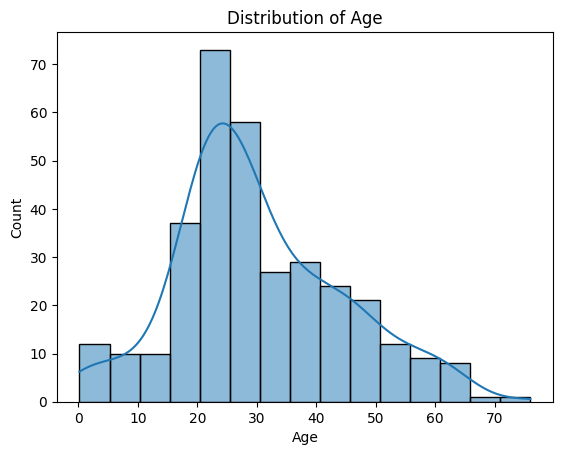

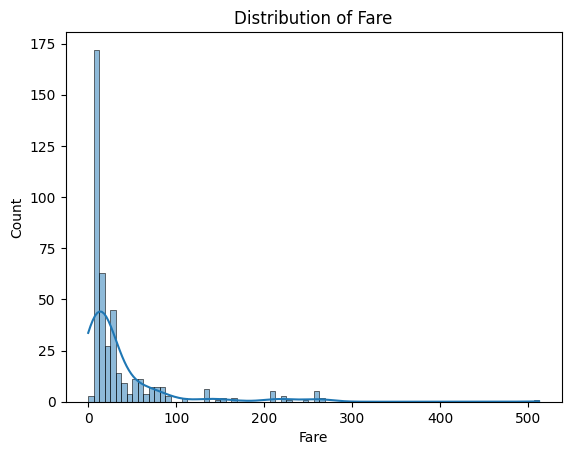

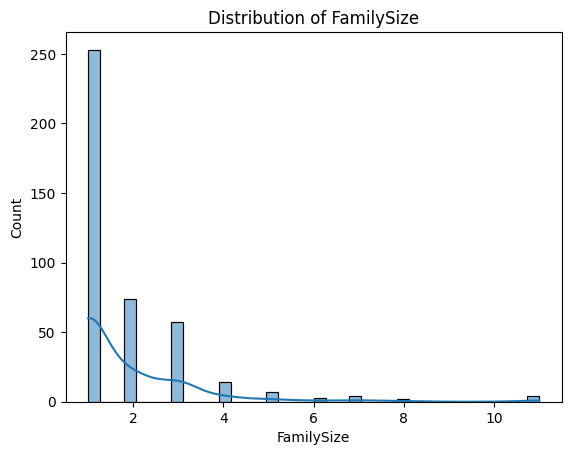

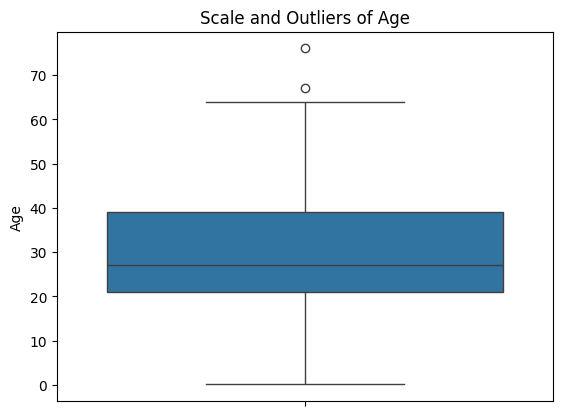

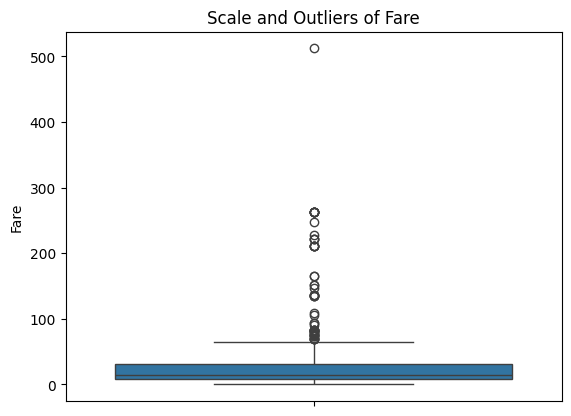

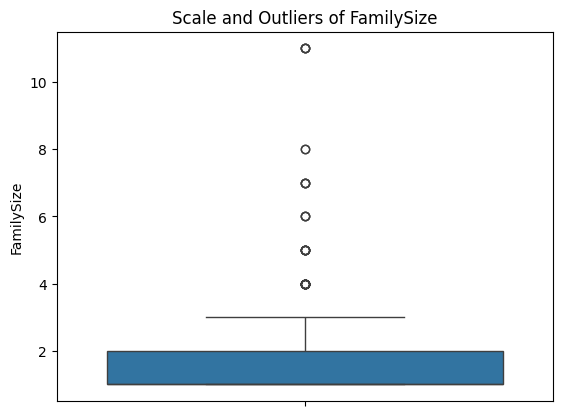

In [13]:
numerical_cols = ['Age', 'Fare', 'FamilySize']
print(df[numerical_cols].describe())

# Histograms for distribution
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Box plots for scale and outliers
for col in numerical_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f'Scale and Outliers of {col}')
    plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_to_standardize = ['Age', 'Fare']

features_to_normalize = ['FamilySize']

scaler = StandardScaler()
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

normalizer = MinMaxScaler()
df[features_to_normalize] = normalizer.fit_transform(df[features_to_normalize])

print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex       Age  SibSp  \
0                              Kelly, Mr. James    male  0.298549      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  1.181328      1   
2                     Myles, Mr. Thomas Francis    male  2.240662      0   
3                              Wirz, Mr. Albert    male -0.231118      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female -0.584229      1   

   Parch   Ticket      Fare Embarked  FamilySize Title  
0      0   330911 -0.497063        Q         0.0   Mr.  
1      0   363272 -0.511926        S         0.1  Mrs.  
2      0   240276 -0.463754        Q         0.0   Mr.  
3      0   315154 -0.482127        S         0.0   Mr.  
4      1  3101298 -0.417151        S     

In [16]:
age_bins = [0, 18, 30, 50, 80]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

df_encoded = pd.get_dummies(df, columns=['AgeGroup'], prefix='Age')

print(df_encoded.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex       Age  SibSp  \
0                              Kelly, Mr. James    male  0.298549      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  1.181328      1   
2                     Myles, Mr. Thomas Francis    male  2.240662      0   
3                              Wirz, Mr. Albert    male -0.231118      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female -0.584229      1   

   Parch   Ticket      Fare Embarked  FamilySize Title  Age_Child  \
0      0   330911 -0.497063        Q         0.0   Mr.       True   
1      0   363272 -0.511926        S         0.1  Mrs.       True   
2      0   240276 -0.463754        Q         0.0   Mr.       True   
3      0   315154 -0.482127        S         0.0  